In [1]:
import numpy as np

T,H = 5,4
hs = np.random.randn(T,H) #평균이 0이고 표준 편차가 1인 표준 정규 분포를 따르는 난수를 생성
a = np.array([0.8,0.1,0.03,0.05,0.02])

ar = a.reshape(5,1).repeat(4, axis=1) #reshape된 배열을 axis=1(즉, 열 방향)으로 4번 반복
print(ar.shape) 

t = hs*ar 
print(t.shape)

c = np.sum(t, axis=0)
print(c.shape)

(5, 4)
(5, 4)
(4,)


In [2]:
N,T,H = 10,5,4
hs = np.random.randn(N,T,H)
a = np.random.randn(N,T)
ar = a.reshape(N,T,1).repeat(H,axis=2)

t = hs*ar
print(t.shape)

c = np.sum(t, axis=1)
print(c.shape)

(10, 5, 4)
(10, 4)


In [3]:
# softmax를 통해 정규화하기(0~1사이의 값을 갖도록)

import sys
sys.path.append('..')
from common.layers import Softmax
import numpy as np

N,T,H = 10,5,4
hs = np.random.randn(N,T,H)
h = np.random.randn(N,H)
hr = h.reshape(N,1,H).repeat(T, axis=1)

t = hs * hr
print(t.shape)

s = np.sum(t, axis=2)
print(s.shape)

softmax = Softmax()
a = softmax.forward(s)
print(a.shape)

(10, 5, 4)
(10, 5)
(10, 5)


## 어텐션을 갖춘 seq2seq

In [4]:
import sys
sys.path.append('..')
sys.path.append('../ch07')
import numpy as np
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

# 데이터 읽기

(x_train, t_train), (x_test, t_test) = sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전

x_train, x_test = x_train[:, ::-1] , x_test[:, ::-1]

# 하이퍼파라미터 설정

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256
batch_size = 128
max_epoch = 10
max_grad = 5.0

model = AttentionSeq2seq(vocab_size, wordvec_size,hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
    
    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse=True)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc*100))

model.save_params()


| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 4.08
| 에폭 1 |  반복 21 / 351 | 시간 4[s] | 손실 3.09
| 에폭 1 |  반복 41 / 351 | 시간 9[s] | 손실 1.90
| 에폭 1 |  반복 61 / 351 | 시간 13[s] | 손실 1.72
| 에폭 1 |  반복 81 / 351 | 시간 18[s] | 손실 1.46
| 에폭 1 |  반복 101 / 351 | 시간 22[s] | 손실 1.19
| 에폭 1 |  반복 121 / 351 | 시간 26[s] | 손실 1.14
| 에폭 1 |  반복 141 / 351 | 시간 31[s] | 손실 1.09
| 에폭 1 |  반복 161 / 351 | 시간 35[s] | 손실 1.06
| 에폭 1 |  반복 181 / 351 | 시간 40[s] | 손실 1.04
| 에폭 1 |  반복 201 / 351 | 시간 44[s] | 손실 1.03
| 에폭 1 |  반복 221 / 351 | 시간 49[s] | 손실 1.02
| 에폭 1 |  반복 241 / 351 | 시간 53[s] | 손실 1.02
| 에폭 1 |  반복 261 / 351 | 시간 58[s] | 손실 1.01
| 에폭 1 |  반복 281 / 351 | 시간 62[s] | 손실 1.00
| 에폭 1 |  반복 301 / 351 | 시간 67[s] | 손실 1.00
| 에폭 1 |  반복 321 / 351 | 시간 71[s] | 손실 1.00
| 에폭 1 |  반복 341 / 351 | 시간 76[s] | 손실 1.00
Q 10/15/94                     
T 1994-10-15
X 1978-08-11
---
Q thursday, november 13, 2008  
T 2008-11-13
X 1978-08-11
---
Q Mar 25, 2003                 
T 2003-03-25
X 1978-08-11
---
Q Tuesday, November 22, 2016   

c:\Users\tjsdh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjsdh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjsdh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjsdh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjsdh\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


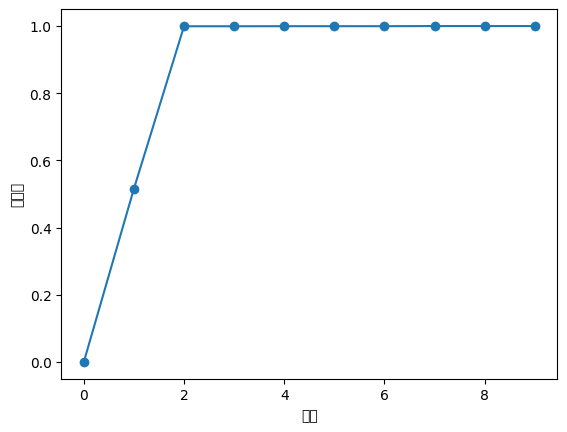

In [5]:
import matplotlib.pyplot as plt

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(-0.05, 1.05)
plt.show()

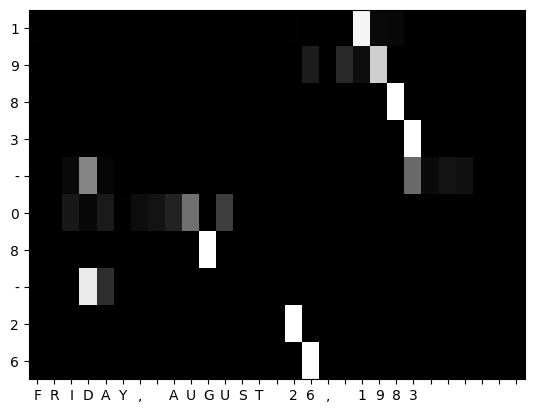

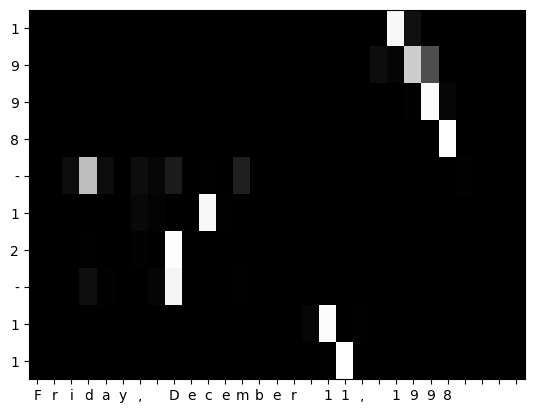

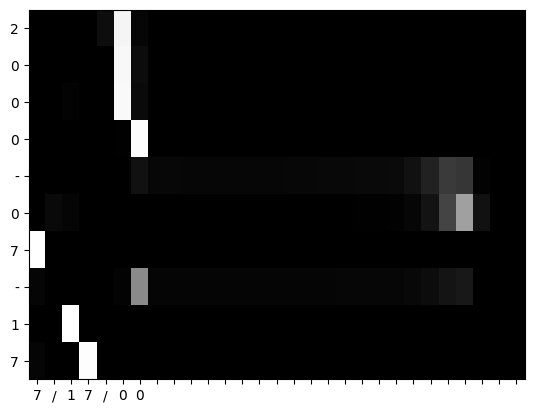

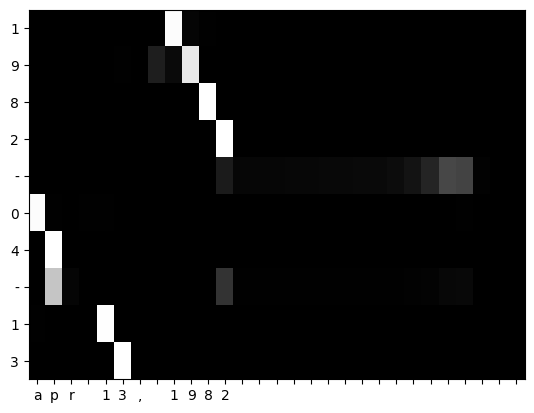

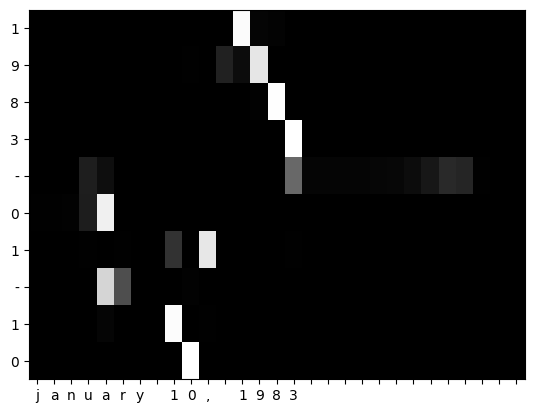

In [6]:

import sys
sys.path.append('..')
import numpy as np
from dataset import sequence
import matplotlib.pyplot as plt
from attention_seq2seq import AttentionSeq2seq


(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('date.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 문장 반전
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 256

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
model.load_params()

_idx = 0
def visualize(attention_map, row_labels, column_labels):
    fig, ax = plt.subplots()
    ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

    ax.patch.set_facecolor('black')
    ax.set_yticks(np.arange(attention_map.shape[0])+0.5, minor=False)
    ax.set_xticks(np.arange(attention_map.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)

    global _idx
    _idx += 1
    plt.show()


np.random.seed(1984)
for _ in range(5):
    idx = [np.random.randint(0, len(x_test))]
    x = x_test[idx]
    t = t_test[idx]

    model.forward(x, t)
    d = model.decoder.attention.attention_weights
    d = np.array(d)
    attention_map = d.reshape(d.shape[0], d.shape[2])

    # 출력하기 위해 반전
    attention_map = attention_map[:,::-1]
    x = x[:,::-1]

    row_labels = [id_to_char[i] for i in x[0]]
    column_labels = [id_to_char[i] for i in t[0]]
    column_labels = column_labels[1:]

    visualize(attention_map, row_labels, column_labels)